In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import h5py  # h5py 라이브러리 추가
import sys
sys.path.append('../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
sys.path.append('../tool_code/python_tool_code/frequency_dataset_generation/')
from DataPlot import Data_Load_Plot, Result_Plot, Loss_Plot, Result_Plot_paper
from FFT_func import FFT

datapath= "C:/Users/User/Desktop/SCH/real_data/"

# .mat 파일 로드
with h5py.File(datapath + 'PD_OpenLoop_ch12-13.mat', 'r') as f:
    fs = np.array(f['fs'])
    Contaminated_data = np.array(f['raw'])

with h5py.File(datapath + 'PD_rest(noStim)_ch12-13.mat', 'r') as f:
    Clean_data = np.array(f['raw'])

Contaminated_data = Contaminated_data.T
Clean_data = Clean_data.T
fs = int(fs.squeeze())

print(fs)
print("Contaminated data.shape:", Contaminated_data.shape)
print("Clean data.shape:", Clean_data.shape)

target_ch = 12
Contaminated = Contaminated_data[target_ch]
Clean = Clean_data[target_ch]

print("Contaminated.shape:", Contaminated.shape)
print("Clean.shape:", Clean.shape)

24414
Contaminated data.shape: (16, 7324200)
Clean data.shape: (16, 7324200)
Contaminated.shape: (7324200,)
Clean.shape: (7324200,)


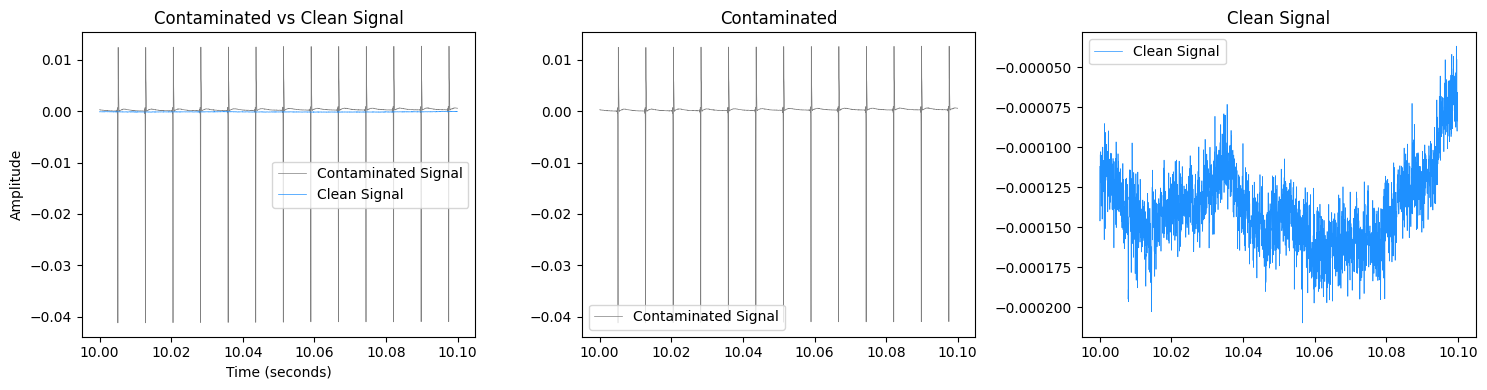

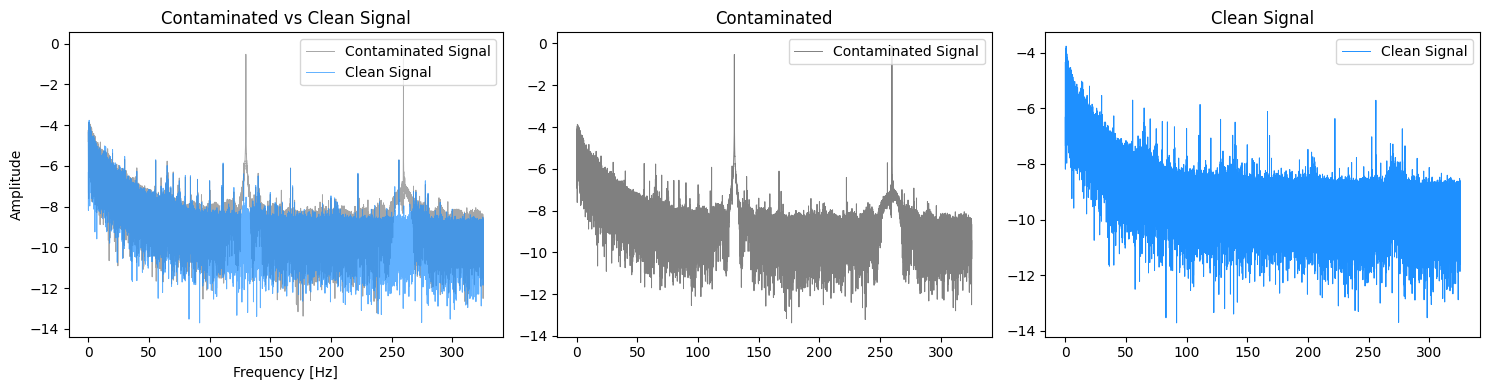

In [16]:
t = np.linspace(0, 300, num=fs*300) 

start_time = 10.00; # [sec]
end_time = 10.1; # [sec]
start_pts = int(start_time*fs)
end_pts = int(end_time*fs)

## Time domain Plotting ###
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(t[start_pts:end_pts], Contaminated[start_pts:end_pts], label='Contaminated Signal', color='gray', alpha=1, linewidth=0.5)
plt.plot(t[start_pts:end_pts], Clean[start_pts:end_pts], label='Clean Signal', color='dodgerblue', alpha=1, linewidth=0.5)
plt.xlabel('Time (seconds)');plt.ylabel('Amplitude')
plt.title('Contaminated vs Clean Signal');plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t[start_pts:end_pts], Contaminated[start_pts:end_pts], label='Contaminated Signal', color='gray', alpha=1, linewidth=0.5)
plt.title('Contaminated');plt.legend()
plt.legend(prop={'size': 10}, loc='lower left')

plt.subplot(1, 3, 3)
plt.plot(t[start_pts:end_pts], Clean[start_pts:end_pts], label='Clean Signal', color='dodgerblue', alpha=1, linewidth=0.5)
plt.title('Clean Signal');plt.legend()
plt.tight_layout()
plt.show()

## Frequency domain Plottig ###  
freqs, _, _, Contaminated_psd = FFT(Contaminated, fs, single_sided=True)
_, _, _, Clean_psd = FFT(Clean, fs, single_sided=True)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(freqs[1:fs*4], np.log10(Contaminated_psd[0][1:fs*4]), label='Contaminated Signal', color='gray', alpha=0.7, linewidth=0.7)
plt.plot(freqs[1:fs*4], np.log10(Clean_psd[0][1:fs*4]), label='Clean Signal', color='dodgerblue', alpha=0.7, linewidth=0.7)
plt.xlabel('Frequency [Hz]');plt.ylabel('Amplitude')
plt.title('Contaminated vs Clean Signal');plt.legend()

plt.subplot(1, 3, 2)
plt.plot(freqs[1:fs*4], np.log10(Contaminated_psd[0][1:fs*4]), label='Contaminated Signal', color='gray', alpha=1, linewidth=0.7)
plt.title('Contaminated');plt.legend()

plt.subplot(1, 3, 3)
plt.plot(freqs[1:fs*4], np.log10(Clean_psd[0][1:fs*4]), label='Clean Signal', color='dodgerblue', alpha=1, linewidth=0.7)
plt.title('Clean Signal');plt.legend()
plt.tight_layout()
plt.show()